### Data Sources

The datasets used in this project are as follows:

1. **Fruit Fresh and Rotten Classification Dataset**  
   Source: [https://github.com/Bangkit-JKT2-D/fruits-fresh-rotten-classification](https://github.com/Bangkit-JKT2-D/fruits-fresh-rotten-classification/tree/master)

2. **Fruit Instance Segmentation Dataset (FruitSeg30)**  
   Source: [https://data.mendeley.com/datasets/vkht8pfsp3/3](https://data.mendeley.com/datasets/vkht8pfsp3/3)


""
These subsequent cells processe fruit segmentation masks to generate normalized polygon labels compatible with YOLOv8 segmentation training.  
For each image-mask pair, it extracts contours from the mask, normalizes polygon points relative to image dimensions,  
and writes them to label files in YOLO format with the specified class ID.
""

In [1]:
import os
import cv2
from glob import glob

# Define the class ID for the fruit type (e.g., apple=0, banana=1, orange=2)
class_id = 0  # Update this value accordingly for each fruit category

# Directories containing images, masks, and where labels will be saved
images_dir = '/content/drive/MyDrive/FruitSeg30/Apple/Images'  # Path to input JPG images
masks_dir = '/content/drive/MyDrive/FruitSeg30/Apple/Mask'    # Path to corresponding PNG masks
labels_dir = '/content/drive/MyDrive/FruitSeg30/Apple/labels'  # Directory to save generated label files
os.makedirs(labels_dir, exist_ok=True)  # Create labels directory if it doesn't exist

# Retrieve sorted list of image file paths
img_files = sorted(glob(os.path.join(images_dir, '*.jpg')))

for img_path in img_files:
    base = os.path.splitext(os.path.basename(img_path))[0]  # Extract image base name without extension
    mask_name = f"{base}_mask.png"                         # Construct corresponding mask filename
    mask_path = os.path.join(masks_dir, mask_name)
    label_path = os.path.join(labels_dir, base + '.txt')  # Label file path for YOLO format polygons

    if not os.path.exists(mask_path):
        print(f"Mask not found for {img_path}, skipping...")
        continue

    # Load mask in grayscale mode
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    height, width = mask.shape

    # Find external contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    with open(label_path, 'w') as f:
        for cnt in contours:
            # Skip contours with insufficient points to form a polygon
            if len(cnt) < 6:
                continue

            # Normalize contour points by image width and height
            norm_points = []
            for point in cnt.squeeze():
                x, y = point
                norm_points.append(x / width)
                norm_points.append(y / height)

            # Write class ID and normalized polygon points to label file
            line = f"{class_id} " + " ".join(f"{pt:.6f}" for pt in norm_points) + "\n"
            f.write(line)

Processesing banana segmentation masks to generate normalized polygon labels in YOLOv8 format.  

In [2]:
# Set the class ID for the fruit category (banana=1 here)
class_id = 1  # Update this value for each fruit category accordingly

# Define directories for images, masks, and output labels
images_dir = '/content/drive/MyDrive/FruitSeg30/Banana/Images'  # Path to input JPG images
masks_dir = '/content/drive/MyDrive/FruitSeg30/Banana/Mask'    # Path to corresponding PNG masks
labels_dir = '/content/drive/MyDrive/FruitSeg30/Banana/labels'  # Directory to save generated label files
os.makedirs(labels_dir, exist_ok=True)  # Create labels directory if it doesn't exist

# Get sorted list of all image file paths
img_files = sorted(glob(os.path.join(images_dir, '*.jpg')))

for img_path in img_files:
    base = os.path.splitext(os.path.basename(img_path))[0]  # Extract filename without extension
    mask_name = f"{base}_mask.png"                         # Construct corresponding mask filename
    mask_path = os.path.join(masks_dir, mask_name)
    label_path = os.path.join(labels_dir, base + '.txt')  # Label file path for YOLO polygon format

    if not os.path.exists(mask_path):
        print(f"Mask not found for {img_path}, skipping...")
        continue

    # Load mask in grayscale mode
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    height, width = mask.shape

    # Find external contours in the mask image
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    with open(label_path, 'w') as f:
        for cnt in contours:
            # Skip contours with fewer than 6 points (not a valid polygon)
            if len(cnt) < 6:
                continue

            # Normalize contour points by image width and height
            norm_points = []
            for point in cnt.squeeze():
                x, y = point
                norm_points.append(x / width)
                norm_points.append(y / height)

            # Write class ID and normalized polygon points to label file
            line = f"{class_id} " + " ".join(f"{pt:.6f}" for pt in norm_points) + "\n"
            f.write(line)

In [3]:
# Assign class ID for the fruit category (orange=2 here)
class_id = 2  # Update this for each fruit category accordingly

# Define directories for images, masks, and label outputs
images_dir = '/content/drive/MyDrive/FruitSeg30/Orange/Images'  # Path to input JPG images
masks_dir = '/content/drive/MyDrive/FruitSeg30/Orange/Mask'    # Path to corresponding PNG masks
labels_dir = '/content/drive/MyDrive/FruitSeg30/Orange/labels'  # Directory to save YOLO polygon label files
os.makedirs(labels_dir, exist_ok=True)  # Create labels directory if it doesn't exist

# Retrieve sorted list of image file paths
img_files = sorted(glob(os.path.join(images_dir, '*.jpg')))

for img_path in img_files:
    base = os.path.splitext(os.path.basename(img_path))[0]  # Extract base filename without extension
    mask_name = f"{base}_mask.png"                         # Construct corresponding mask filename
    mask_path = os.path.join(masks_dir, mask_name)
    label_path = os.path.join(labels_dir, base + '.txt')  # Path for YOLO polygon label file

    if not os.path.exists(mask_path):
        print(f"Mask not found for {img_path}, skipping...")
        continue

    # Load mask image in grayscale
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    height, width = mask.shape

    # Find external contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    with open(label_path, 'w') as f:
        for cnt in contours:
            # Ignore contours with fewer than 6 points (not a valid polygon)
            if len(cnt) < 6:
                continue

            # Normalize contour points by image width and height
            norm_points = []
            for point in cnt.squeeze():
                x, y = point
                norm_points.append(x / width)
                norm_points.append(y / height)

            # Write class ID and normalized polygon points to label file in YOLOv8 format
            line = f"{class_id} " + " ".join(f"{pt:.6f}" for pt in norm_points) + "\n"
            f.write(line)

In [4]:
"""
This cell organizes the FruitSeg30 dataset by consolidating images and their corresponding polygon label files
from different fruit categories (Apple, Banana, Orange) into a unified directory structure compatible with YOLOv8 training.

It performs the following steps:
- Collects image-label pairs for all fruit classes.
- Shuffles and splits the dataset into training (80%) and validation (20%) subsets.
- Copies images and labels into respective train/val folders.
- Generates a 'data.yaml' file defining dataset paths and class names for YOLOv8 configuration.
"""

import os
import shutil
import random
from glob import glob

# Define fruit categories and base dataset path
fruits = ['Apple', 'Banana', 'Orange']
base_path = '/content/drive/MyDrive/FruitSeg30/'  # Root directory of segmented fruit dataset

# Define output directory for YOLOv8 formatted dataset
output_path = '/content/drive/MyDrive/Dataset'
os.makedirs(output_path, exist_ok=True)

# Define train/validation subdirectories for images and labels
image_train_dir = os.path.join(output_path, 'images/train')
image_val_dir = os.path.join(output_path, 'images/val')
label_train_dir = os.path.join(output_path, 'labels/train')
label_val_dir = os.path.join(output_path, 'labels/val')

# Create directories if they don't exist
for directory in [image_train_dir, image_val_dir, label_train_dir, label_val_dir]:
    os.makedirs(directory, exist_ok=True)

# Aggregate all image-label pairs across fruit classes
all_data = []
for class_id, fruit in enumerate(fruits):
    img_dir = os.path.join(base_path, fruit, 'Images')
    label_dir = os.path.join(base_path, fruit, 'labels')
    img_files = glob(os.path.join(img_dir, '*.jpg'))
    for img_path in img_files:
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(label_dir, base_name + '.txt')
        if os.path.exists(label_path):
            all_data.append((img_path, label_path))
        else:
            print(f'Warning: label not found for {img_path}')

# Shuffle dataset and split into training and validation sets (80/20 split)
random.shuffle(all_data)
split_idx = int(0.8 * len(all_data))
train_data = all_data[:split_idx]
val_data = all_data[split_idx:]

# Function to copy images and labels to their respective directories
def copy_files(data_list, img_dest, label_dest):
    for img_path, label_path in data_list:
        shutil.copy(img_path, os.path.join(img_dest, os.path.basename(img_path)))
        shutil.copy(label_path, os.path.join(label_dest, os.path.basename(label_path)))

# Copy training and validation data
copy_files(train_data, image_train_dir, label_train_dir)
copy_files(val_data, image_val_dir, label_val_dir)

# Print dataset statistics
print(f'Train samples: {len(train_data)}')
print(f'Validation samples: {len(val_data)}')

# Generate YOLOv8 data.yaml configuration file
data_yaml = f"""
path: {output_path}
train: images/train
val: images/val

names:
  0: Apple
  1: Banana
  2: Orange
"""

with open(os.path.join(output_path, 'data.yaml'), 'w') as f:
    f.write(data_yaml.strip())

print('Dataset preparation complete.')

Train samples: 184
Validation samples: 46
Dataset preparation complete.


## Installing ultralytics

In [5]:
!pip install ultralytics

# Training YOLOv8 Segmentation Model on Custom Dataset

This cell demonstrates how to load a pretrained YOLOv8 Nano segmentation model and train it on your custom dataset.  
The YOLOv8 Nano model is lightweight and optimized for fast training and inference, making it ideal for quick prototyping.  

Key points:
- The `data.yaml` file should define the dataset paths and class names according to YOLOv8 format.
- `epochs=50` specifies the number of training iterations.
- `imgsz=640` resizes all input images to 640×640 pixels for consistent training.

This simple API from the Ultralytics library abstracts the complex training pipeline, enabling efficient model development with minimal code.


In [17]:
from ultralytics import YOLO

# Load the pretrained YOLOv8 Nano segmentation model
model_seg = YOLO('yolov8n-seg.pt')

# Train the model on your custom dataset specified in data.yaml
model_seg.train(data='/content/drive/MyDrive/Dataset/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

train: Scanning /content/drive/MyDrive/Dataset/labels/train.cache... 83 images, 0 backgrounds, 0 corrupt: 100%|██████████| 83/83 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.4±3.0 ms, read: 8.5±4.4 MB/s, size: 20.6 KB)


val: Scanning /content/drive/MyDrive/Dataset/labels/val.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]


Plotting labels to runs/segment/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.54G     0.6415      2.322       3.06      1.177          8        640: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         76        151    0.00336      0.506     0.0713     0.0344     0.0034      0.512     0.0533      0.034



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.54G      0.531       1.61      2.862      1.075         10        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         76        151    0.00412      0.506      0.285      0.194    0.00424       0.53      0.285      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G     0.6258     0.8318      2.357      1.195          5        640: 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]


                   all         76        151    0.00379      0.506      0.268      0.203    0.00401      0.538      0.268      0.252

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.54G     0.5271     0.9843      1.834      1.061          5        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         76        151    0.00377      0.506       0.36      0.268    0.00408      0.544      0.361      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.54G     0.7266     0.8391      1.797      1.158          6        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         76        151          1     0.0686      0.409      0.298          1     0.0686       0.41      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.55G     0.5544     0.7447      1.413      1.086         11        640: 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]


                   all         76        151      0.899      0.279      0.445      0.345      0.899      0.279      0.445      0.413

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G     0.6085     0.7153      1.487      1.114          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]


                   all         76        151      0.949      0.169      0.446      0.339      0.949      0.169      0.447      0.411

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.58G      0.645     0.7198      1.416      1.077          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         76        151      0.888      0.114      0.359      0.284      0.888      0.114      0.361      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.61G     0.6002     0.7485      1.224      1.112          8        640: 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]


                   all         76        151      0.953      0.407      0.478      0.366      0.953      0.407      0.479      0.427

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.63G     0.5854     0.7911       1.16      1.048          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]


                   all         76        151      0.863      0.462      0.495      0.391      0.871      0.468      0.497      0.466

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.63G     0.6198     0.7254       1.27      1.096         11        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         76        151      0.973      0.495      0.504      0.373      0.973      0.495      0.505      0.488

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.65G      0.585     0.5866      1.093      1.045          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         76        151      0.831      0.298       0.45      0.305      0.831      0.298      0.451      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.65G     0.6229     0.5645      1.159        1.1          7        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


                   all         76        151      0.757      0.496      0.477      0.356      0.757      0.496       0.48      0.446

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.65G     0.6028     0.6451      1.155      1.096          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]


                   all         76        151      0.673       0.49      0.467      0.286      0.692      0.473      0.465      0.347

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.65G     0.5595     0.5111      1.307      1.099          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]


                   all         76        151      0.803      0.469      0.481      0.341      0.795      0.458      0.474      0.391

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.65G     0.6257     0.7141      1.135      1.108          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         76        151      0.575      0.454      0.454      0.336      0.575      0.454      0.454      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.66G     0.6193     0.7621      1.066       1.06         12        640: 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]


                   all         76        151      0.597      0.456      0.447      0.337      0.597      0.456      0.447      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.67G     0.6242      0.709       1.06      1.067         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all         76        151      0.872      0.473      0.486      0.337      0.872      0.473      0.486       0.42

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.67G     0.5837     0.6708      1.067      1.081          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]


                   all         76        151      0.858      0.467      0.494      0.326      0.858      0.467      0.494       0.38

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.67G     0.6638      0.831      1.184      1.179          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]

                   all         76        151      0.821      0.475      0.485      0.327      0.821      0.475      0.486      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.67G     0.5306     0.8092      1.018      1.026         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]


                   all         76        151      0.761      0.432      0.464      0.325      0.753      0.426      0.459      0.336

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.67G     0.5321     0.6453      1.002      1.039         13        640: 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


                   all         76        151      0.721        0.4      0.437       0.32      0.711      0.394      0.436      0.311

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.67G     0.5836     0.6444     0.9423       1.07          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         76        151       0.81       0.41      0.468      0.347       0.81       0.41      0.468      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.67G     0.4933     0.6366     0.9634      1.016         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         76        151      0.766      0.462      0.488      0.374      0.766      0.462      0.488      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.67G      0.514     0.5137     0.9784      1.023          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]


                   all         76        151      0.808      0.497      0.509      0.357      0.808      0.497      0.509       0.44

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.67G     0.5082     0.7079     0.9113       1.02         13        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]


                   all         76        151      0.666      0.507      0.501      0.388      0.666      0.507      0.501      0.456

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.67G     0.4931      0.569     0.8458     0.9897         10        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all         76        151      0.689      0.506      0.506      0.389      0.689      0.506      0.506      0.455

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.67G     0.4589     0.5007     0.8837      1.023          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         76        151      0.909      0.522      0.507      0.381      0.909      0.522      0.506      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.67G     0.5317     0.6462     0.9372      1.041          8        640: 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         76        151      0.912      0.518      0.509      0.388      0.921      0.524      0.512      0.408

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.67G     0.5244     0.6644      0.807      1.093          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


                   all         76        151      0.855      0.494      0.509      0.421      0.863        0.5      0.517      0.461

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.67G     0.5192     0.7667     0.9133     0.9988          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


                   all         76        151      0.907      0.491      0.514      0.422      0.917      0.497      0.522      0.452

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.67G     0.5171     0.6103      0.784      1.022         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         76        151      0.961      0.512      0.518      0.432      0.971      0.518      0.525      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.67G     0.5015     0.5825     0.8063      1.052          9        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


                   all         76        151      0.985      0.511      0.518      0.432      0.996      0.517      0.525      0.481

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.67G     0.4609      0.489     0.8145      1.024          6        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]


                   all         76        151      0.971      0.512      0.517      0.434      0.982      0.518      0.525      0.486

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.67G     0.4961     0.6691     0.7745      1.028          7        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]


                   all         76        151       0.97      0.512      0.517      0.435      0.981      0.518      0.524      0.491

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.67G     0.4718     0.6532     0.7946     0.9955          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         76        151      0.983      0.518      0.527      0.439      0.983      0.518      0.525      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.67G     0.4659     0.6393     0.8694     0.9947         10        640: 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


                   all         76        151       0.98      0.518      0.528       0.44       0.98      0.518      0.525       0.49

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G     0.4729     0.5887     0.7559     0.9587          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all         76        151      0.976      0.506      0.524      0.442      0.976      0.506      0.521      0.488

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.67G     0.4468     0.4998     0.7045     0.9575          6        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


                   all         76        151      0.993      0.505      0.526      0.448      0.993      0.505      0.523      0.492

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.67G     0.4382     0.7363     0.6665     0.9592          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         76        151      0.959      0.512      0.524      0.442      0.959      0.512      0.522      0.492


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.68G     0.4494     0.6684       1.35      1.153          3        640: 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         76        151      0.962      0.518      0.525      0.439      0.962      0.518      0.522      0.489

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.68G      0.448     0.5829      1.153      1.073          5        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all         76        151      0.934      0.501      0.516      0.418      0.934      0.501      0.513      0.481

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.68G     0.3638     0.5265      1.167      1.041          3        640: 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         76        151      0.936       0.51      0.522      0.391      0.936       0.51      0.519      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.68G     0.4253      0.529      1.214       1.08          3        640: 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         76        151      0.961      0.515      0.527      0.411      0.961      0.515      0.524      0.498

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.68G     0.3635     0.5801      1.049     0.9755          3        640: 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         76        151      0.972      0.512      0.528      0.424      0.972      0.512      0.525      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.68G      0.397     0.5803      1.045     0.9938          4        640: 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


                   all         76        151      0.988      0.506      0.526      0.451      0.988      0.506      0.523      0.498

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.68G     0.3878     0.6923      1.186     0.9978          3        640: 100%|██████████| 6/6 [00:01<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]


                   all         76        151       0.99      0.506      0.525      0.452       0.99      0.506      0.526      0.499

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.68G      0.362      0.489     0.9271      1.005          7        640: 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         76        151      0.993      0.506      0.525      0.453      0.993      0.506      0.525      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.68G     0.3428     0.5778      1.298     0.9719          3        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]


                   all         76        151      0.994      0.506      0.525      0.452      0.994      0.506      0.525      0.499

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.68G     0.3451     0.6495      1.134      1.004          4        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         76        151      0.995      0.506      0.525      0.453      0.995      0.506      0.525      0.498

50 epochs completed in 0.050 hours.
Optimizer stripped from runs/segment/train6/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train6/weights/best.pt, 6.8MB

Validating runs/segment/train6/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:01,  1.83it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:01<00:00,  1.14it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]


                   all         76        151      0.994      0.506      0.525      0.452      0.994      0.506      0.525      0.499
                 Apple         21         40      0.993      0.525      0.526      0.487      0.993      0.525      0.526      0.523
                Banana         28         54      0.995      0.519      0.574       0.48      0.995      0.519      0.574      0.528
                Orange         27         57      0.994      0.474      0.476      0.387      0.994      0.474      0.476      0.446
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/segment/train6


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e507feddd10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

# Model Validation and Performance Metrics

This cell runs the validation process on the trained YOLOv8 segmentation model using the validation dataset specified in the `data.yaml` file.  
The `model_seg.val()` method computes key performance metrics such as mean Average Precision (mAP), Precision, Recall, and F1-score, which are essential for assessing the quality of both object detection and instance segmentation.

- **mAP (mean Average Precision):** Summarizes the model’s accuracy across different Intersection over Union (IoU) thresholds.
- **Precision:** Measures the accuracy of positive predictions.
- **Recall:** Measures the model’s ability to find all relevant objects.
- **F1-score:** Harmonic mean of Precision and Recall, providing a balanced metric.

Evaluating these metrics helps determine how well the model generalizes to unseen data and guides further tuning or improvements.

For more details on these metrics and their interpretation, see the [Ultralytics Performance Metrics Guide](https://docs.ultralytics.com/guides/yolo-performance-metrics/).



In [18]:
metrics = model_seg.val()
print(metrics)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 6.4±3.4 MB/s, size: 21.4 KB)


val: Scanning /content/drive/MyDrive/Dataset/labels/val.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:02,  1.38it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.14it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


                   all         76        151      0.994      0.506      0.525      0.452      0.994      0.506      0.525      0.498
                 Apple         21         40      0.993      0.525      0.526      0.487      0.993      0.525      0.526      0.523
                Banana         28         54      0.995      0.519      0.574      0.481      0.995      0.519      0.574       0.53
                Orange         27         57      0.994      0.474      0.476      0.389      0.994      0.474      0.476      0.443
Speed: 12.1ms preprocess, 9.8ms inference, 0.0ms loss, 10.3ms postprocess per image
Results saved to runs/segment/train62
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e501947b4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-R

# Preparing Data Generators for Image Classification with Data Augmentation

This cell sets up the data pipeline for training and validating a convolutional neural network (CNN) for fruit classification.  

Key points:
- The dataset directory contains 6 class folders (e.g., fresh-apple, rotten-apple, etc.).
- `ImageDataGenerator` is used to apply real-time data augmentation on training images to improve model generalization.
- Validation images are only rescaled without augmentation to provide a consistent evaluation set.
- `validation_split=0.2` reserves 20% of the data for validation.
- Training and validation data are loaded using `flow_from_directory` with appropriate subsets.

This setup ensures efficient batch loading and augmentation during model training, which is crucial for robust classification performance.

---



In [9]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Directory containing classification dataset organized by class folders
data_dir = '/content/drive/MyDrive/Classification'

# Input image dimensions and batch size configuration
img_height, img_width = 224, 224
batch_size = 16
num_classes = 6  # Number of target classes (e.g., fresh-apple, rotten-apple, etc.)

# Setup data augmentation for training and rescaling for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Reserve 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training data generator with augmentation and shuffling enabled
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator with only rescaling, no augmentation
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 96 images belonging to 6 classes.
Found 24 images belonging to 6 classes.


# Just a debugging...nothin speciall :)

In [11]:
import tensorflow as tf
import keras
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

TensorFlow Version: 2.15.0
Keras Version: 2.15.0


# Defining and Testing a Convolutional Neural Network for Image Classification

This cell builds a straightforward convolutional neural network (CNN) tailored for multi-class fruit classification.  
The architecture consists of convolutional layers to automatically extract hierarchical image features, followed by fully connected layers to perform classification.  

Key points:  
- Convolutional layers capture spatial patterns such as edges and textures, enabling the model to learn meaningful representations from raw images.  
- MaxPooling layers reduce spatial dimensions, helping to generalize and reduce computation.  
- The final dense layers aggregate extracted features and output class probabilities via a softmax activation.  
- Clearing the Keras backend session ensures a clean slate before model creation, preventing resource conflicts.  
- A dummy prediction on random data verifies the model architecture is correctly built and operational before training.

This design balances simplicity and effectiveness, making it suitable for your fruit classification task.

For more on CNNs and their role in image classification, see:  
- [What is a Convolutional Neural Network? — Quera Blog](https://quera.org/blog/what-is-a-convolutional-neural-network/)  
- [CNN Fundamentals — HowSam Academy](https://howsam.org/convolutional-neural-network/)  
- [Image Classification with CNNs in Keras — Faradars](https://shahaab-co.com/mag/edu/deep-learning/image-classification-using-convolutional-neural-networks-in-keras/)


In [19]:
import numpy as np
import tensorflow as tf

# Clear any existing Keras session to avoid clutter from old models/layers
tf.keras.backend.clear_session()

# Define a simple CNN architecture for classification
model_clf = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model_clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Quick sanity check: run a dummy prediction to verify model is operational
x_dummy = np.random.rand(1, img_height, img_width, 3)
print("Testing model prediction after reset...")
print(model_clf.predict(x_dummy))

Testing model prediction after reset...
1/1 [==============================] - 0s 97ms/step
[[    0.18744     0.23343     0.13487     0.16599     0.12551     0.15276]]


## More debugging...

In [14]:
x, y = next(train_generator)  # یا train_generator.__next__()
print("Batch Shape:", x.shape)
print("Labels Shape:", y.shape)
print("Sample Label:", np.argmax(y[0]))

Batch Shape: (16, 224, 224, 3)
Labels Shape: (16, 6)
Sample Label: 3


## Training the classifier model

In [20]:
with tf.device('/GPU:0'):
    history = model_clf.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=20,
        validation_data=val_generator,
        validation_steps=val_generator.samples // val_generator.batch_size
    )

Epoch 1/20
6/6 [==============================] - 12s 2s/step - loss: 17.4932 - accuracy: 0.1979 - val_loss: 6.5677 - val_accuracy: 0.2500
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 2.7533 - accuracy: 0.1562 - val_loss: 1.6270 - val_accuracy: 0.3125
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 1.7010 - accuracy: 0.2500 - val_loss: 1.5315 - val_accuracy: 0.3750
Epoch 4/20
6/6 [==============================] - 10s 2s/step - loss: 1.6041 - accuracy: 0.3125 - val_loss: 1.4694 - val_accuracy: 0.2500
Epoch 5/20
6/6 [==============================] - 9s 1s/step - loss: 1.4093 - accuracy: 0.5000 - val_loss: 1.1707 - val_accuracy: 0.6875
Epoch 6/20
6/6 [==============================] - 13s 2s/step - loss: 1.2317 - accuracy: 0.5521 - val_loss: 0.9724 - val_accuracy: 0.5625
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 1.1503 - accuracy: 0.5208 - val_loss: 1.2153 - val_accuracy: 0.4375
Epoch 8/20
6/6 [==================

# Evaluation of Classification Model Performance

This cell evaluates the trained classification model on the validation dataset by generating a detailed classification report and visualizing the confusion matrix.  
The classification report summarizes precision, recall, F1-score, and support for each class, providing insights into the model’s strengths and weaknesses.  
The confusion matrix heatmap offers a clear visual representation of correct and incorrect predictions across all classes, helping to identify common misclassifications.  

These metrics are essential for understanding model accuracy and guiding further improvements.


2/2 [==============================] - 1s 132ms/step
                precision    recall  f1-score   support

  fresh-apples       1.00      0.75      0.86         4
 fresh-bananas       0.75      0.75      0.75         4
 fresh-oranges       0.80      1.00      0.89         4
 rotten-apples       0.33      0.75      0.46         4
rotten-bananas       1.00      0.50      0.67         4
rotten-oranges       0.00      0.00      0.00         4

      accuracy                           0.62        24
     macro avg       0.65      0.62      0.60        24
  weighted avg       0.65      0.62      0.60        24



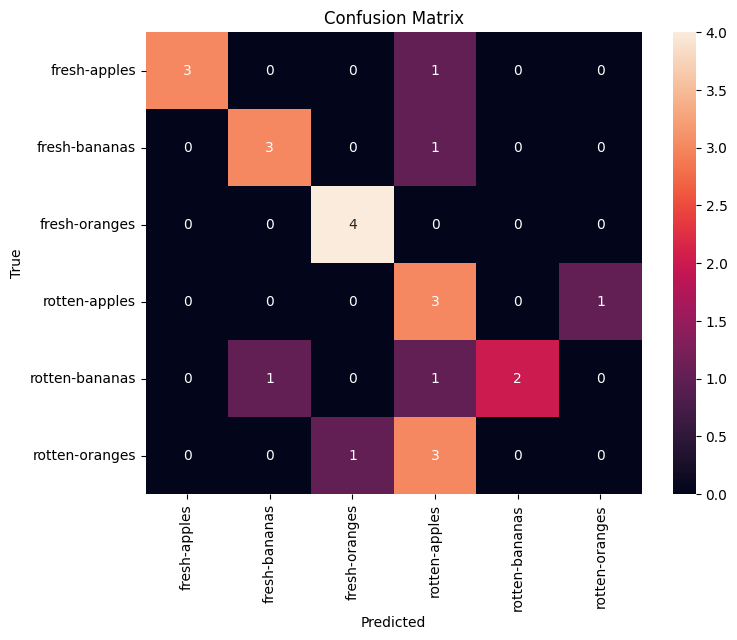

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the validation data generator to start from the beginning
val_generator.reset()

# Predict class probabilities for all validation samples
Y_pred = model_clf.predict(val_generator)

# Convert predicted probabilities to class indices
y_pred = np.argmax(Y_pred, axis=1)

# Ground truth class indices from the validation generator
y_true = val_generator.classes

# Print detailed classification metrics: precision, recall, f1-score per class
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

# Compute confusion matrix to summarize prediction results
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap for intuitive visualization
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys(),
    cmap='Blues'
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Combined Segmentation and Classification Pipeline Visualization

This cell performs instance segmentation on an input image using the pretrained YOLOv8 segmentation model (`model_seg`),  
extracts detected object bounding boxes, and classifies each cropped region with the trained classification model (`model_clf`).  

Key steps:  
- Preprocess each detected crop for classification input.  
- Predict fruit class and confidence score per detected instance.  
- Overlay bounding boxes and class labels with confidence scores on the original image.  
- Display the final annotated image for visual inspection of combined model performance.

This integrated approach enables detailed fruit detection and quality classification in a single workflow, facilitating practical applications.

---




0: 640x640 1 Apple, 12.4ms
Speed: 2.9ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
1/1 [==============================] - 0s 37ms/step


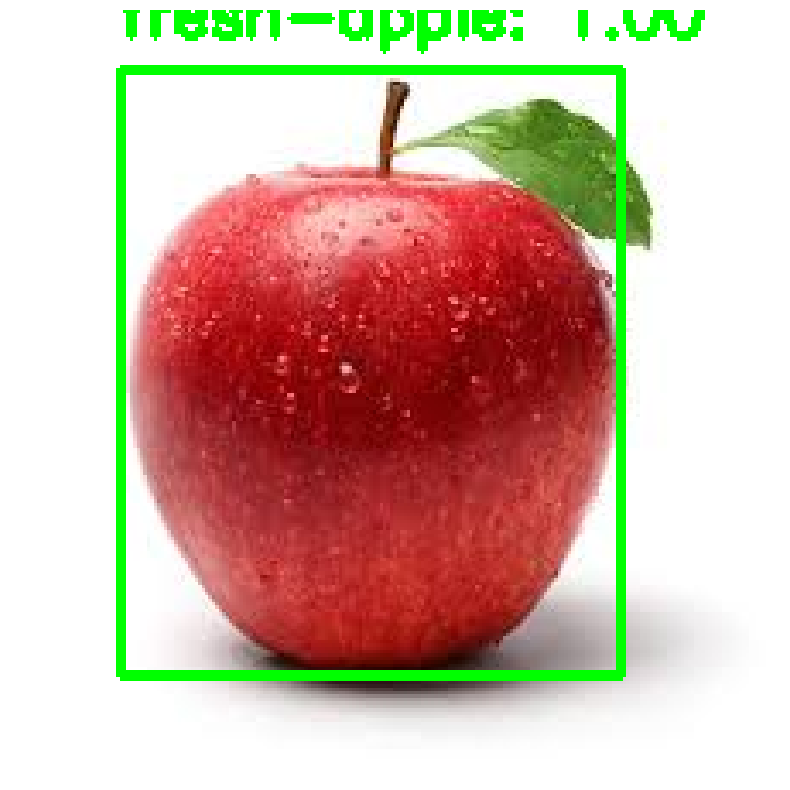

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume model_seg and model_clf are already defined and trained in the current session

# List of class names corresponding to classification model output indices
class_names = ['fresh-apple', 'rotten-apple', 'fresh-orange', 'rotten-orange', 'fresh-banana', 'rotten-banana']

def preprocess_for_clf(img, size=(224,224)):
    # Resize image to model input size and normalize pixel values to [0,1]
    img = cv2.resize(img, size)
    img = img / 255.0
    return np.expand_dims(img, axis=0)  # Add batch dimension

def classify_crops(image, detections):
    results = []
    for det in detections:
        x1, y1, x2, y2 = map(int, det[:4])
        crop = image[y1:y2, x1:x2]
        if crop.size == 0:
            continue  # Skip empty crops
        input_img = preprocess_for_clf(crop)
        pred = model_clf.predict(input_img)
        class_id = np.argmax(pred)
        confidence = np.max(pred)
        results.append({'bbox': (x1, y1, x2, y2), 'class_id': class_id, 'confidence': confidence})
    return results

def draw_results(image, results):
    for res in results:
        x1, y1, x2, y2 = res['bbox']
        label = f"{class_names[res['class_id']]}: {res['confidence']:.2f}"
        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Put label text above the bounding box
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    return image

# Load test image (replace with your image path)
image_path = '/content/drive/MyDrive/test_4.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

# Run segmentation model to detect fruit instances
results = model_seg(image_rgb)

# Extract bounding boxes from the first result (single image)
result = results[0]
detections = result.boxes.xyxy.cpu().numpy()

# Classify each detected crop using the classification model
classification_results = classify_crops(image_rgb, detections)

# Draw bounding boxes and class labels on the image
output_image = draw_results(image_rgb.copy(), classification_results)

# Display the final annotated image
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()